In [495]:
import numpy as np 
import pandas as pd 
import os

import seaborn as sns 
import matplotlib.pyplot as plt 
import csv

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder




# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score

In [512]:
train_df = pd.read_csv('C:\\Users\\siddh\\Desktop\\DES\\train_files5\\train_df.csv')
test_df = pd.read_csv('C:\\Users\\siddh\\Desktop\\DES\\test_files5\\test_df.csv')

In [513]:
train_df = train_df.drop('Unnamed: 0', axis = 1)
test_df = test_df.drop('Unnamed: 0', axis = 1)

In [514]:
len(train_df), len(test_df)

(12050, 3290)

In [515]:
sum(train_df['503.01a'] <= 0)

1250

In [516]:
train_df = train_df[~(train_df['503.01a'] <= 0)]
test_df = test_df[~(test_df['503.01a'] <= 0)]

In [517]:
sum(test_df['503.01a'] <= 0)

0

In [518]:
len(train_df), len(test_df)

(10800, 3130)

In [519]:
train_df[train_df['503.01a'] <= 0]

,2A1,3A1,503.01a,5A2,7B1


In [520]:
test_df[test_df['503.01a'] <= 0]

,2A1,3A1,503.01a,5A2,7B1


In [521]:
x_train = train_df.drop('503.01a', axis = 1)
y_train = train_df['503.01a']

In [522]:
x_test = test_df.drop('503.01a', axis = 1)
y_test = test_df['503.01a']

In [523]:
len(x_train), len(y_train)

(10800, 10800)

In [524]:
len(x_test), len(y_test)

(3130, 3130)

In [372]:
### Decision Tree Regressor (Please please work): 

In [373]:
import numpy as np 
  
# import matplotlib.pyplot for plotting our result
import matplotlib.pyplot as plt
  
# import pandas for importing csv files 
import pandas as pd 


from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [374]:
from sklearn.tree import DecisionTreeRegressor 
  
    
    
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 9) 
  
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=9)

In [375]:
y1 = regressor.predict(x_test)

In [376]:
r2_score(y_test,y1)

-0.40941308345598504

In [377]:
# RMSE, MSE
np.sqrt(mean_squared_error(y_test,y1)), mean_squared_error(y_test,y1)

(0.23149214864370835, 0.05358861488368076)

In [378]:
regressor.feature_importances_

array([0.01132569, 0.97600518, 0.00615761, 0.00651151])

### Random Forest Regressor

In [379]:
from sklearn.ensemble import RandomForestRegressor

In [380]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [381]:
rf1 = rf.predict(x_test)

In [382]:
train_pred_rf = rf.predict(x_train)
r2_score(y_train, train_pred_rf)

0.8738445038932312

In [383]:
r2_score(y_test,rf1), np.sqrt(mean_squared_error(y_test,rf1))

(0.011388359837307127, 0.19387864526856963)

In [385]:
(mean_squared_error(y_test,rf1))

0.03758892909117585

In [280]:
rf1[1:10]

array([1.45824216, 1.45250832, 1.49097321, 1.52169264, 1.52676303,
       1.53292661, 1.52011609, 1.5263492 , 1.55101538])

<AxesSubplot:>

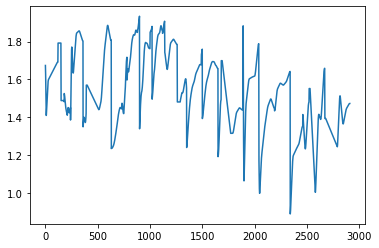

In [386]:
# Plot 3
y_test.plot() # Testing Data

<AxesSubplot:>

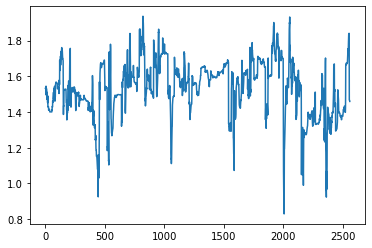

In [387]:
# Predicted Data
pd.Series(rf1).plot()

In [357]:
rf.feature_importances_

array([0.36629837, 0.22206041, 0.17563397, 0.23600725])

# GridSearchCV

In [388]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [389]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, scoring = 'neg_root_mean_squared_error', param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [391]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [208]:
rf = RandomForestRegressor(n_estimators = 2000, min_samples_split = 5, min_samples_leaf= 1, max_features= 'sqrt', 
                           max_depth = 10, bootstrap = True)

In [392]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [393]:
rf_y_pred = rf.predict(x_train)

In [394]:
rf_y_pred_test = rf.predict(x_test)

In [395]:
# Training Data R2 Score
r2_score(y_train,rf_y_pred)

0.8443189422461967

In [396]:
rf.feature_importances_

array([0.34138142, 0.4588747 , 0.08575614, 0.11398774])

In [397]:
# Testing data R2 Score

r2_score(y_test,rf_y_pred_test)


0.04962320206470339

In [398]:
np.sqrt(mean_squared_error(y_test, rf_y_pred_test)), (mean_squared_error(y_test,rf_y_pred_test))

(0.1900925204856885, 0.0361351663446019)

TypeError: r2_score() missing 1 required positional argument: 'y_pred'

<AxesSubplot:>

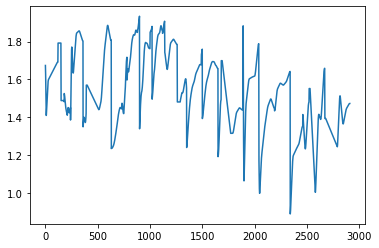

In [399]:
# 3
y_test.plot()

<AxesSubplot:>

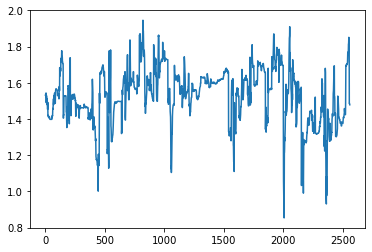

In [400]:
# Predicted Data
pd.Series(rf_y_pred_test).plot()

### MART

In [401]:
from sklearn.ensemble import GradientBoostingRegressor

In [402]:
est = GradientBoostingRegressor(n_estimators=1000, max_depth=1, learning_rate=0.5)

In [403]:
est.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=1, n_estimators=1000)

In [404]:
gbr_yp = est.predict(x_test)

pred_train = est.predict(x_train)

In [405]:
# Train R2
r2_score(y_train,pred_train)

0.9826681959035043

In [406]:
# Test R2
r2_score(y_test,gbr_yp)

0.13331109322120738

In [407]:
np.sqrt(mean_squared_error(y_test,gbr_yp)), (mean_squared_error(y_test,gbr_yp))

(0.18153013704057946, 0.032953190653971565)

In [408]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [409]:
est.feature_importances_

array([0.02065242, 0.74193037, 0.00293116, 0.23448605])

<AxesSubplot:>

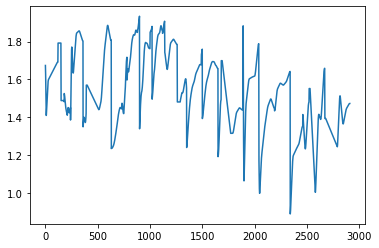

In [410]:
# 3
y_test.plot()

<AxesSubplot:>

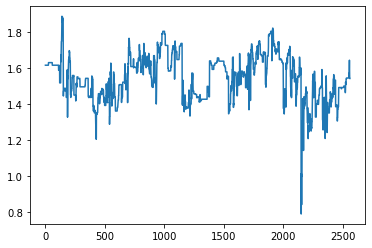

In [411]:
# 3
pd.Series(gbr_yp).plot()

# GridSearchCV

In [412]:
lst = list(np.arange(0.01,1, 0.1))
lst

[0.01,
 0.11,
 0.21000000000000002,
 0.31000000000000005,
 0.41000000000000003,
 0.51,
 0.6100000000000001,
 0.7100000000000001,
 0.81,
 0.91]

In [413]:
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': lst,
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100, 300, 500,800, 1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [414]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.11, 0.21000000000000002,
                                           0.31000000000000005,
                                           0.41000000000000003, 0.51,
                                           0.6100000000000001,
                                           0.7100000000000001, 0.81, 0.91],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 300, 500, 800, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [416]:
grid_GBR.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.1}

In [417]:
gbrt = GradientBoostingRegressor(n_estimators=300, max_depth=8, learning_rate=0.01, subsample=0.1)

In [418]:
gbrt.fit(x_train, y_train)
gbrt_y = gbrt.predict(x_test)

In [419]:
# Training R2

r2_score(y_train, gbrt.predict(x_train))

0.5125158028633304

In [420]:
# Testing R2

r2_score(y_test,gbrt_y)

0.23963719239666947

In [421]:
np.sqrt(mean_squared_error(y_test,gbrt_y)), (mean_squared_error(y_test,gbrt_y))

(0.17003078090042123, 0.028910466453607047)

In [422]:
gbrt.feature_importances_

array([0.23388899, 0.39682084, 0.00191711, 0.36737306])

<AxesSubplot:>

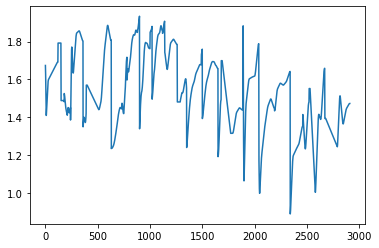

In [423]:
# 3
y_test.plot()

<AxesSubplot:>

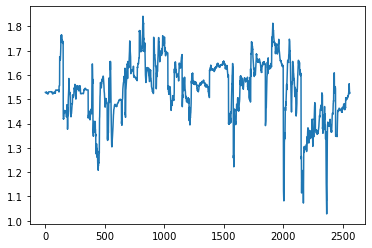

In [424]:
# 3
pd.Series(gbrt_y).plot()

In [539]:
model_name = ['MLR', 'DTR', 'RF', 'RFGS', 'MART', 'MARTGR']



In [540]:
avgs = [0.625599563, 0.262748496, 0.217419587, 0.20462071, 0.199730502, 0.197186133]

In [555]:
plot_df = pd.DataFrame({'Model': model_name, 'Average RMSE': avgs})

In [556]:
plot_df

,Model,Average RMSE
0,MLR,0.625600
1,DTR,0.262748
2,RF,0.217420
3,RFGS,0.204621
4,MART,0.199731
5,MARTGR,0.197186


In [557]:
import seaborn as sns

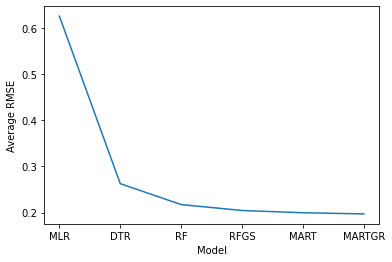

In [558]:
sns.lineplot(data = plot_df, x = 'Model', y = 'Average RMSE', markers=True, dashes=True);

<AxesSubplot:xlabel='Model'>

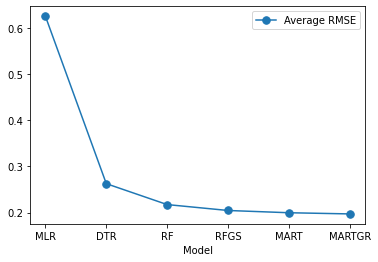

In [560]:
plot_df.plot(x = 'Model', y = 'Average RMSE', marker=".", markersize=15)

In [554]:
0.197186133/np.mean(y_test)

0.13044538575948866

In [446]:
# Multiple Linear Regression

In [525]:
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [526]:
y_prediction =  LR.predict(x_test)

In [527]:
r2_score(y_test,y_prediction), np.sqrt(mean_squared_error(y_test,y_prediction)), mean_squared_error(y_test,y_prediction)

(-7.072220710511234, 0.6350277244727898, 0.40326021084908936)

NameError: name 'var' is not defined

In [529]:
import statistics

In [532]:
statistics.variance(y_test)

0.04997250491764432

In [533]:
one = [0.41749701, 0.07507083, 0.00126883, 0.50616332]
two = [0.21450978, 0.27795832, 0.00229268, 0.50523922]
three = [0.23388899, 0.39682084, 0.00191711, 0.36737306]
four = [0.22331132, 0.43480799, 0.00297729, 0.3389034]
five = [0.17077908, 0.0040891 , 0.00507413, 0.82005769]

In [536]:
avg = []
total = 0
for i in range(len(one)): 
    total = one[i] + two[i] + three[i] + four[i] + five[i]
    a = total/5
    avg.append(a)
    total = 0

In [537]:
avg

[0.251997236, 0.237749416, 0.002706008, 0.507547338]